## Lab - EDA Bivariate Analysis: Diving into Amazon UK Product Insights Part II
Objective: Delve into the dynamics of product pricing on Amazon UK to uncover insights that can inform business strategies and decision-making.

Dataset: This lab utilizes the Amazon UK product dataset which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

In [67]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [68]:
Data = pd.read_csv("amz_uk_price_prediction_dataset.csv")
df = Data.copy()
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


### Part 1: Analyzing Best-Seller Trends Across Product Categories
Objective: Understand the relationship between product categories and their best-seller status.

#### 1. Crosstab Analysis

- Create a crosstab between the product category and the isBestSeller status.

- Are there categories where being a best-seller is more prevalent?

Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.


<span style="color:purple">MY NOTE: "Crosstab analysis (cross-tabulation) is a statistical method used to examine the relationship between two or more categorical variables by displaying their frequency distribution in a matrix format."</span>


In [69]:
# crosstab_sorted = pd.crosstab(df['category'], df['isBestSeller'], normalize='index') # standard crosstab
df_crosstab_proportion = pd.crosstab(df['category'], df['isBestSeller'], normalize='index') # use normalize to get the proportion

df_crosstab_proportion

isBestSeller,False,True
category,,
3D Printers,0.995968,0.004032
3D Printing & Scanning,0.999508,0.000492
Abrasive & Finishing Products,0.980000,0.020000
Action Cameras,0.999411,0.000589
Adapters,0.988189,0.011811
...,...,...
Wind Instruments,0.972000,0.028000
Window Treatments,0.979079,0.020921
Women,0.988015,0.011985


In [70]:
df_crosstab_sorted = df_crosstab_proportion.sort_values(by=True, ascending=False)

df_crosstab_sorted

isBestSeller,False,True
category,,
Grocery,0.941865,0.058135
Smart Home Security & Lighting,0.942308,0.057692
Health & Personal Care,0.942314,0.057686
Mobile Phone Accessories,0.957529,0.042471
Power & Hand Tools,0.964661,0.035339
...,...,...
"CD, Disc & Tape Players",1.000000,0.000000
General Music-Making Accessories,1.000000,0.000000
Snowboard Boots,1.000000,0.000000


In [71]:
# "Grocery" has the most best-sellers proportionally

#### 2. Statistical Tests:

- Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
- Compute Cramér's V to understand the strength of association between best-seller status and category.


In [72]:
# Chi-square test

crosstab = pd.crosstab(df['category'], df['isBestSeller'])
chi2_stat, p_value, dof, expected = stats.chi2_contingency(crosstab)


print(f"p-value: {p_value}")

p-value: 0.0


In [73]:
# Cramer'S V

n = crosstab.sum().sum()  # Total sample size
min_dim = min(crosstab.shape) - 1  # Minimum of (rows - 1) or (columns - 1)

cramers_v = np.sqrt(chi2_stat / (n * min_dim))


print(f"cramers_v: {cramers_v}")




cramers_v: 0.1222829439760564


In [74]:
# Result

# cramers_v = 0.1222829439760564 ------> 0.1 to 0.3 -------> Moderate association


#### 3. Visualizations:

- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.


In [75]:


# # Count products per category
# category_counts = df['category'].value_counts()

# # Set a threshold (e.g., categories with fewer than 5 products are grouped into "Other")
# threshold = 10000
# top_categories = category_counts[category_counts >= threshold].index

# # Replace rare categories with "Other"
# df['category_grouped'] = df['category'].apply(lambda x: x if x in top_categories else "Other")

# # Create a new crosstab with grouped categories
# crosstab_grouped = pd.crosstab(df['category_grouped'], df['isBestSeller'])

# # Plot the stacked bar chart
# ax = crosstab_grouped.plot(kind='bar', stacked=True, figsize=(15,6), colormap="viridis")

# # Add labels and title
# plt.xlabel("Product Category (Grouped)")
# plt.ylabel("Proportion of Best-Seller Status")
# plt.title("Best-Seller Distribution by Product Category")
# plt.legend(title="Is Best Seller", labels=["No", "Yes"])
# plt.xticks(rotation=45)

# # Show the plot
# plt.show()


In [76]:
#-> REVISE ABOVE

### Part 2: Exploring Product Prices and Ratings Across Categories and Brands
Objective: Investigate how different product categories influence product prices.

#### Preliminary Step: Remove outliers in product prices.

For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this

In [77]:
df.head(10)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
5,6,B09B97WSLF,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
6,7,B09B9615X2,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
7,8,B01MTB55WH,Anker Soundcore 2 Portable Bluetooth Speaker w...,4.7,103673,39.99,False,0,Hi-Fi Speakers
8,9,B016MO90GW,"Bluetooth Speaker, Anker Soundcore Speaker Upg...",4.7,29909,29.99,False,0,Hi-Fi Speakers
9,10,B09ZQF5GZW,RIENOK Bluetooth Speaker Portable Wireless Blu...,4.5,16014,29.99,False,0,Hi-Fi Speakers


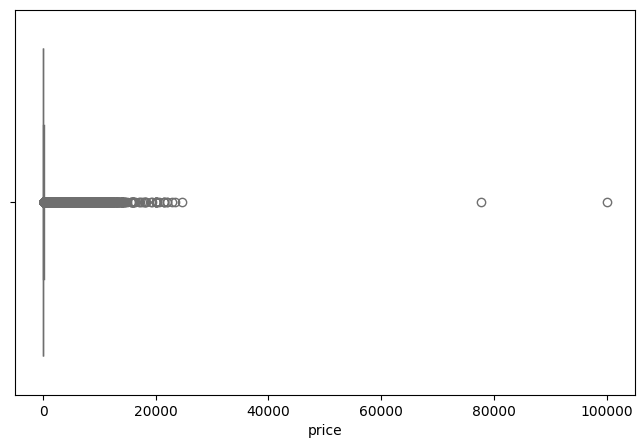

In [78]:
# visualize outliers
plt.figure(figsize=(8,5))
sns.boxplot(x=df['price'], color="skyblue")
plt.show()

In [79]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_filtered = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

print(f"Original data size: {df.shape[0]}")
print(f"Filtered data size: {df_filtered.shape[0]}") #number without outliers


Original data size: 2443651
Filtered data size: 2115963


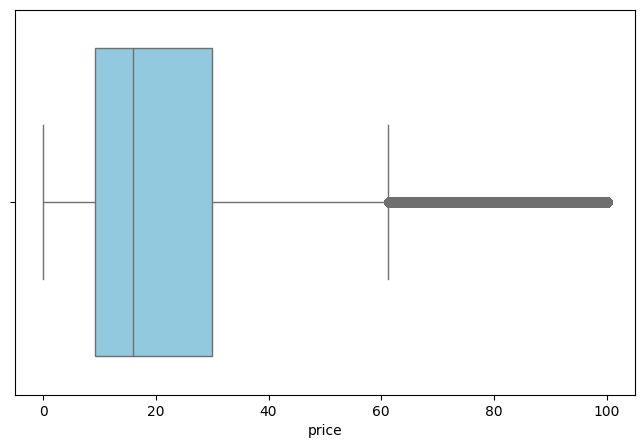

In [80]:
# visualize outliers AGAIN
plt.figure(figsize=(8,5))
sns.boxplot(x=df_filtered['price'], color="skyblue")
plt.show()

#### 1. Violin Plots:

- Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
- Which product category tends to have the highest median price? Don't filter here by top categories.


C:\Users\nicolas\AppData\Local\Temp\ipykernel_19284\1173208898.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_top_20, x='category', y='price', palette="viridis")


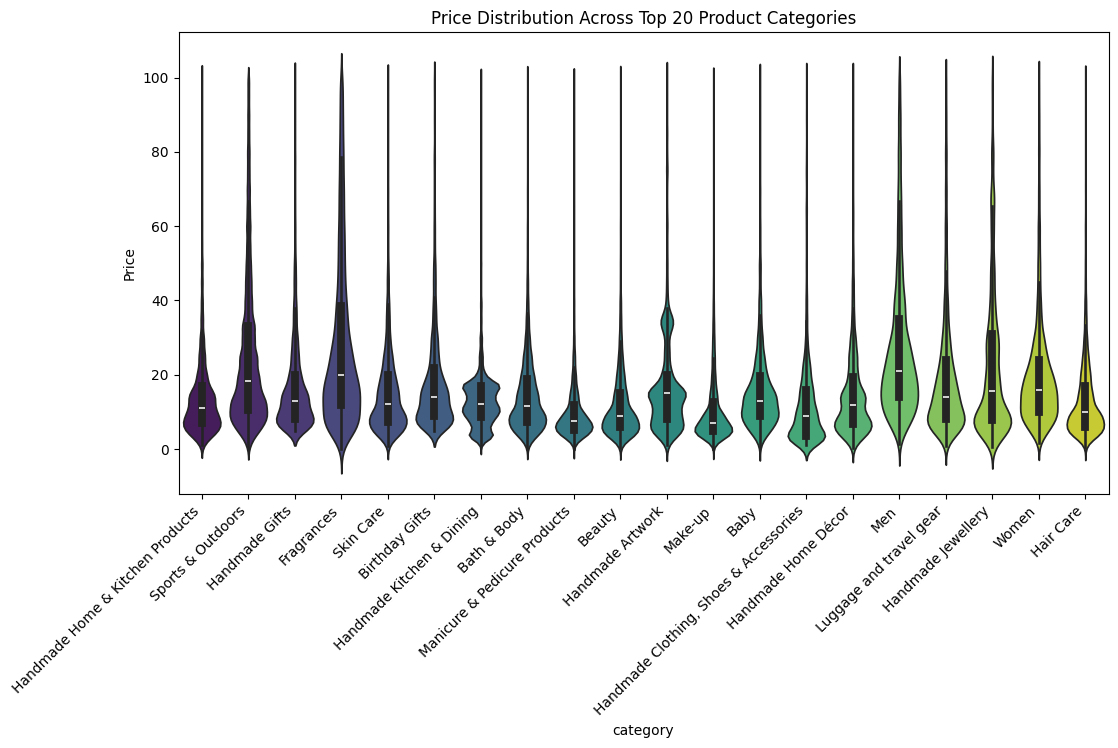

In [82]:

top_20_categories = df_filtered['category'].value_counts().nlargest(20).index

# top 20
df_top_20 = df_filtered[df_filtered['category'].isin(top_20_categories)]

# violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_top_20, x='category', y='price', palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Price")
plt.title("Price Distribution Across Top 20 Product Categories")

plt.show()

In [ ]:


# median price per category
category_median_prices = df_filtered.groupby('category')['price'].median()

# category with the highest median price
highest_median_category = category_median_prices.idxmax()
highest_median_price = category_median_prices.max()

print(f"Highest median price: {highest_median_category} ---> ${highest_median_price}")


Highest median price: Desktop PCs ---> $74.0




#### 2. Bar Charts:

- Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
- Which product category commands the highest average price? Don't filter here by top categories.



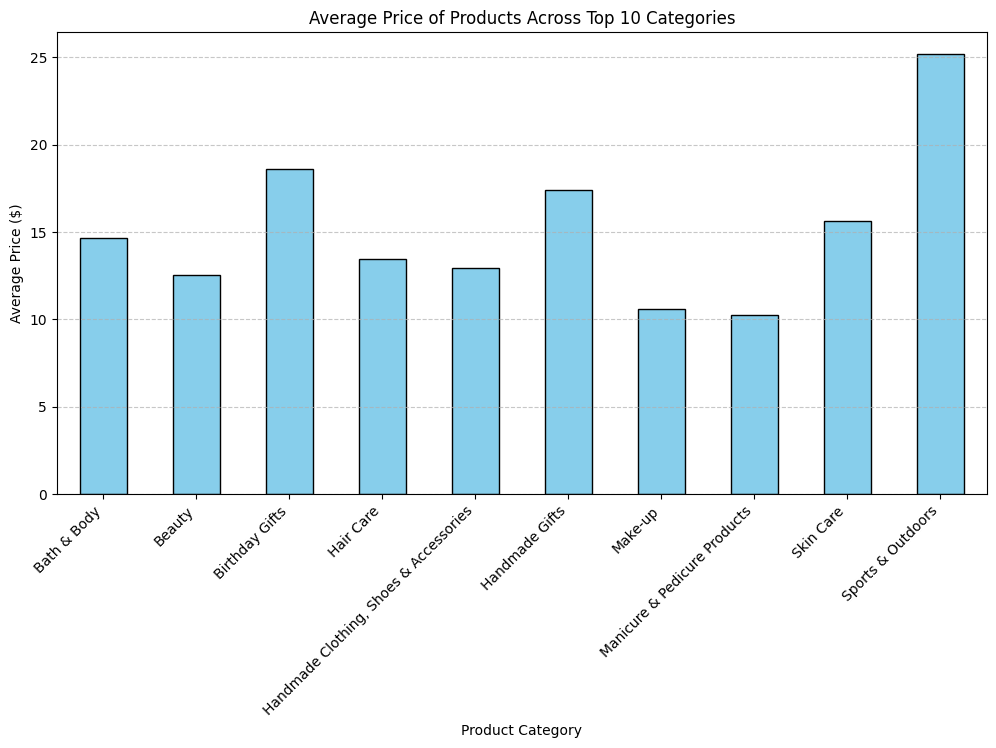

In [91]:



top_10_categories = df_filtered['category'].value_counts().nlargest(10).index

df_top_10 = df_filtered[df_filtered['category'].isin(top_10_categories)]

avg_price_per_category = df_top_10.groupby('category')['price'].mean()

# Plot bar chart
plt.figure(figsize=(12, 6))
avg_price_per_category.plot(kind='bar', color="skyblue", edgecolor='black')
plt.xlabel("Product Category")
plt.ylabel("Average Price ($)")
plt.title("Average Price of Products Across Top 10 Categories")
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()




#### 3. Box Plots:

- Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
- Which category tends to receive the highest median rating from customers? Don't filter here by top categories.



In [ ]:
# filter top 10 count
# distribution of product ratings
# based on category
# box plots


# x ---> category
# y ---> product rating

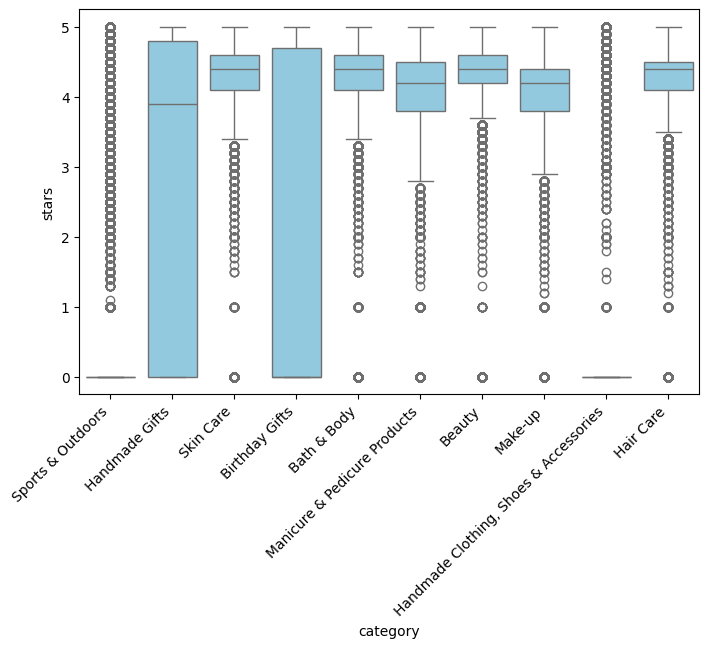

In [94]:


plt.figure(figsize=(8,5))
sns.boxplot(x= df_top_10['category'], y=df_top_10['stars'], color="skyblue")
plt.xticks(rotation=45, ha='right')
plt.show()

In [98]:


# median rating per category
category_median_rating = df_filtered.groupby('category')['stars'].median()

print(category_median_rating)

# category with the highest median rating
highest_median_rating_category = category_median_rating.idxmax()
highest_median_rating = category_median_rating.max()

print(f"Highest median rating: {highest_median_category} ---> ${highest_median_rating}")


category
3D Printers                       4.1
3D Printing & Scanning            0.0
Abrasive & Finishing Products     4.5
Action Cameras                    0.0
Adapters                          4.4
                                 ... 
Wind Instruments                  4.1
Window Treatments                 4.4
Women                             4.3
Women's Sports & Outdoor Shoes    4.3
eBook Readers & Accessories       0.0
Name: stars, Length: 296, dtype: float64
Highest median rating: Desktop PCs ---> $4.7


### Part 3: Investigating the Interplay Between Product Prices and Ratings
Objective: Analyze how product ratings (stars) correlate with product prices.

#### 1. Correlation Coefficients:

- Calculate the correlation coefficient between price and stars.
- Is there a significant correlation between product price and its rating?


In [ ]:
#MY NOTE: "A correlation coefficient is a statistical measure that quantifies the strength and direction of the relationship between two variables. It typically ranges from -1 to 1:

# +1 → Perfect positive correlation (as one variable increases, the other also increases).
# 0 → No correlation (no relationship between the variables).
# -1 → Perfect negative correlation (as one variable increases, the other decreases).

# The most commonly used correlation coefficient is Pearson’s correlation (r), which measures the linear relationship between two continuous variables."

In [105]:
# Pearson correlation
correlation = df_filtered['price'].corr(df_filtered['stars'])

print(f"Correlation coefficient between price and stars: {correlation:}")

Correlation coefficient between price and stars: -0.07767299878181444


In [ ]:
# Interpretation: There is a very weak negative correlation between price and stars
# ---> not significant

#### 2. Visualizations:

- Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
- Use a correlation heatmap to visualize correlations between all numerical variables.
- Examine if product prices typically follow a normal distribution using a QQ plot.


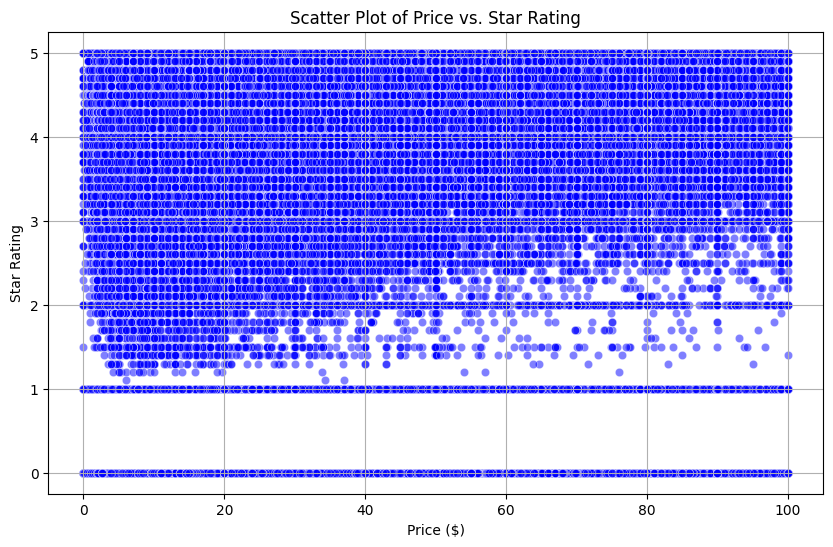

In [107]:
# scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_filtered, x='price', y='stars', alpha=0.5, color="blue")
plt.xlabel("Price ($)")
plt.ylabel("Star Rating")
plt.title("Scatter Plot of Price vs. Star Rating")
plt.grid(True)

plt.show()


In [ ]:
# Observation: ???

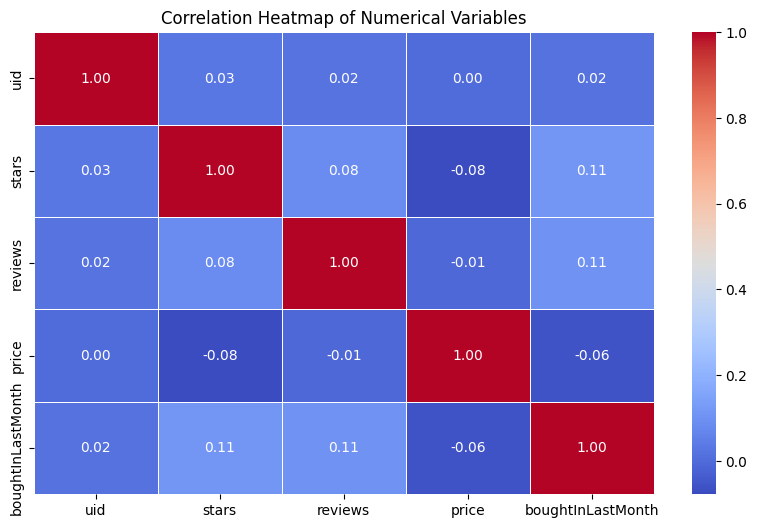

In [110]:


# Select only numeric columns
numeric_df = df_filtered.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add title
plt.title("Correlation Heatmap of Numerical Variables")

# Show plot
plt.show()



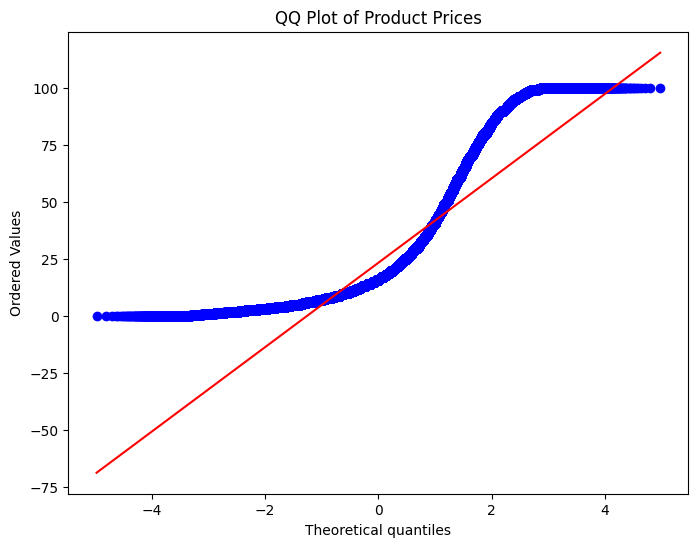

In [ ]:
# QQ plot for product prices
plt.figure(figsize=(8,6))
stats.probplot(df_filtered['price'], dist="norm", plot=plt)
plt.title("QQ Plot of Product Prices")


plt.show()